In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
# Display the first few rows of the dataframe
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Summary statistics
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [5]:
# Check for missing values
train_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

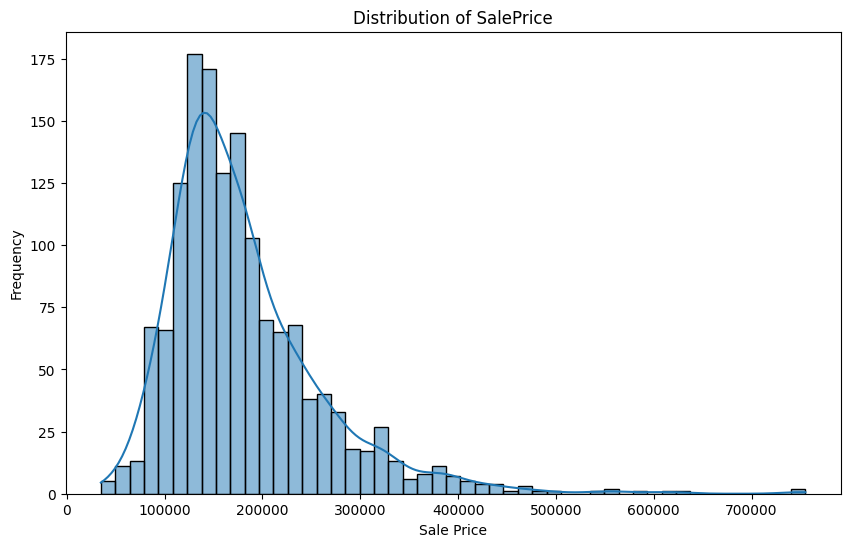

In [6]:
# Visualize distribution of target variable (e.g., SalePrice)
plt.figure(figsize=(10, 6))
sns.histplot(train_df['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

In [7]:
numerical_columns = train_df.select_dtypes(['float64','int64']).columns
numerical_columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

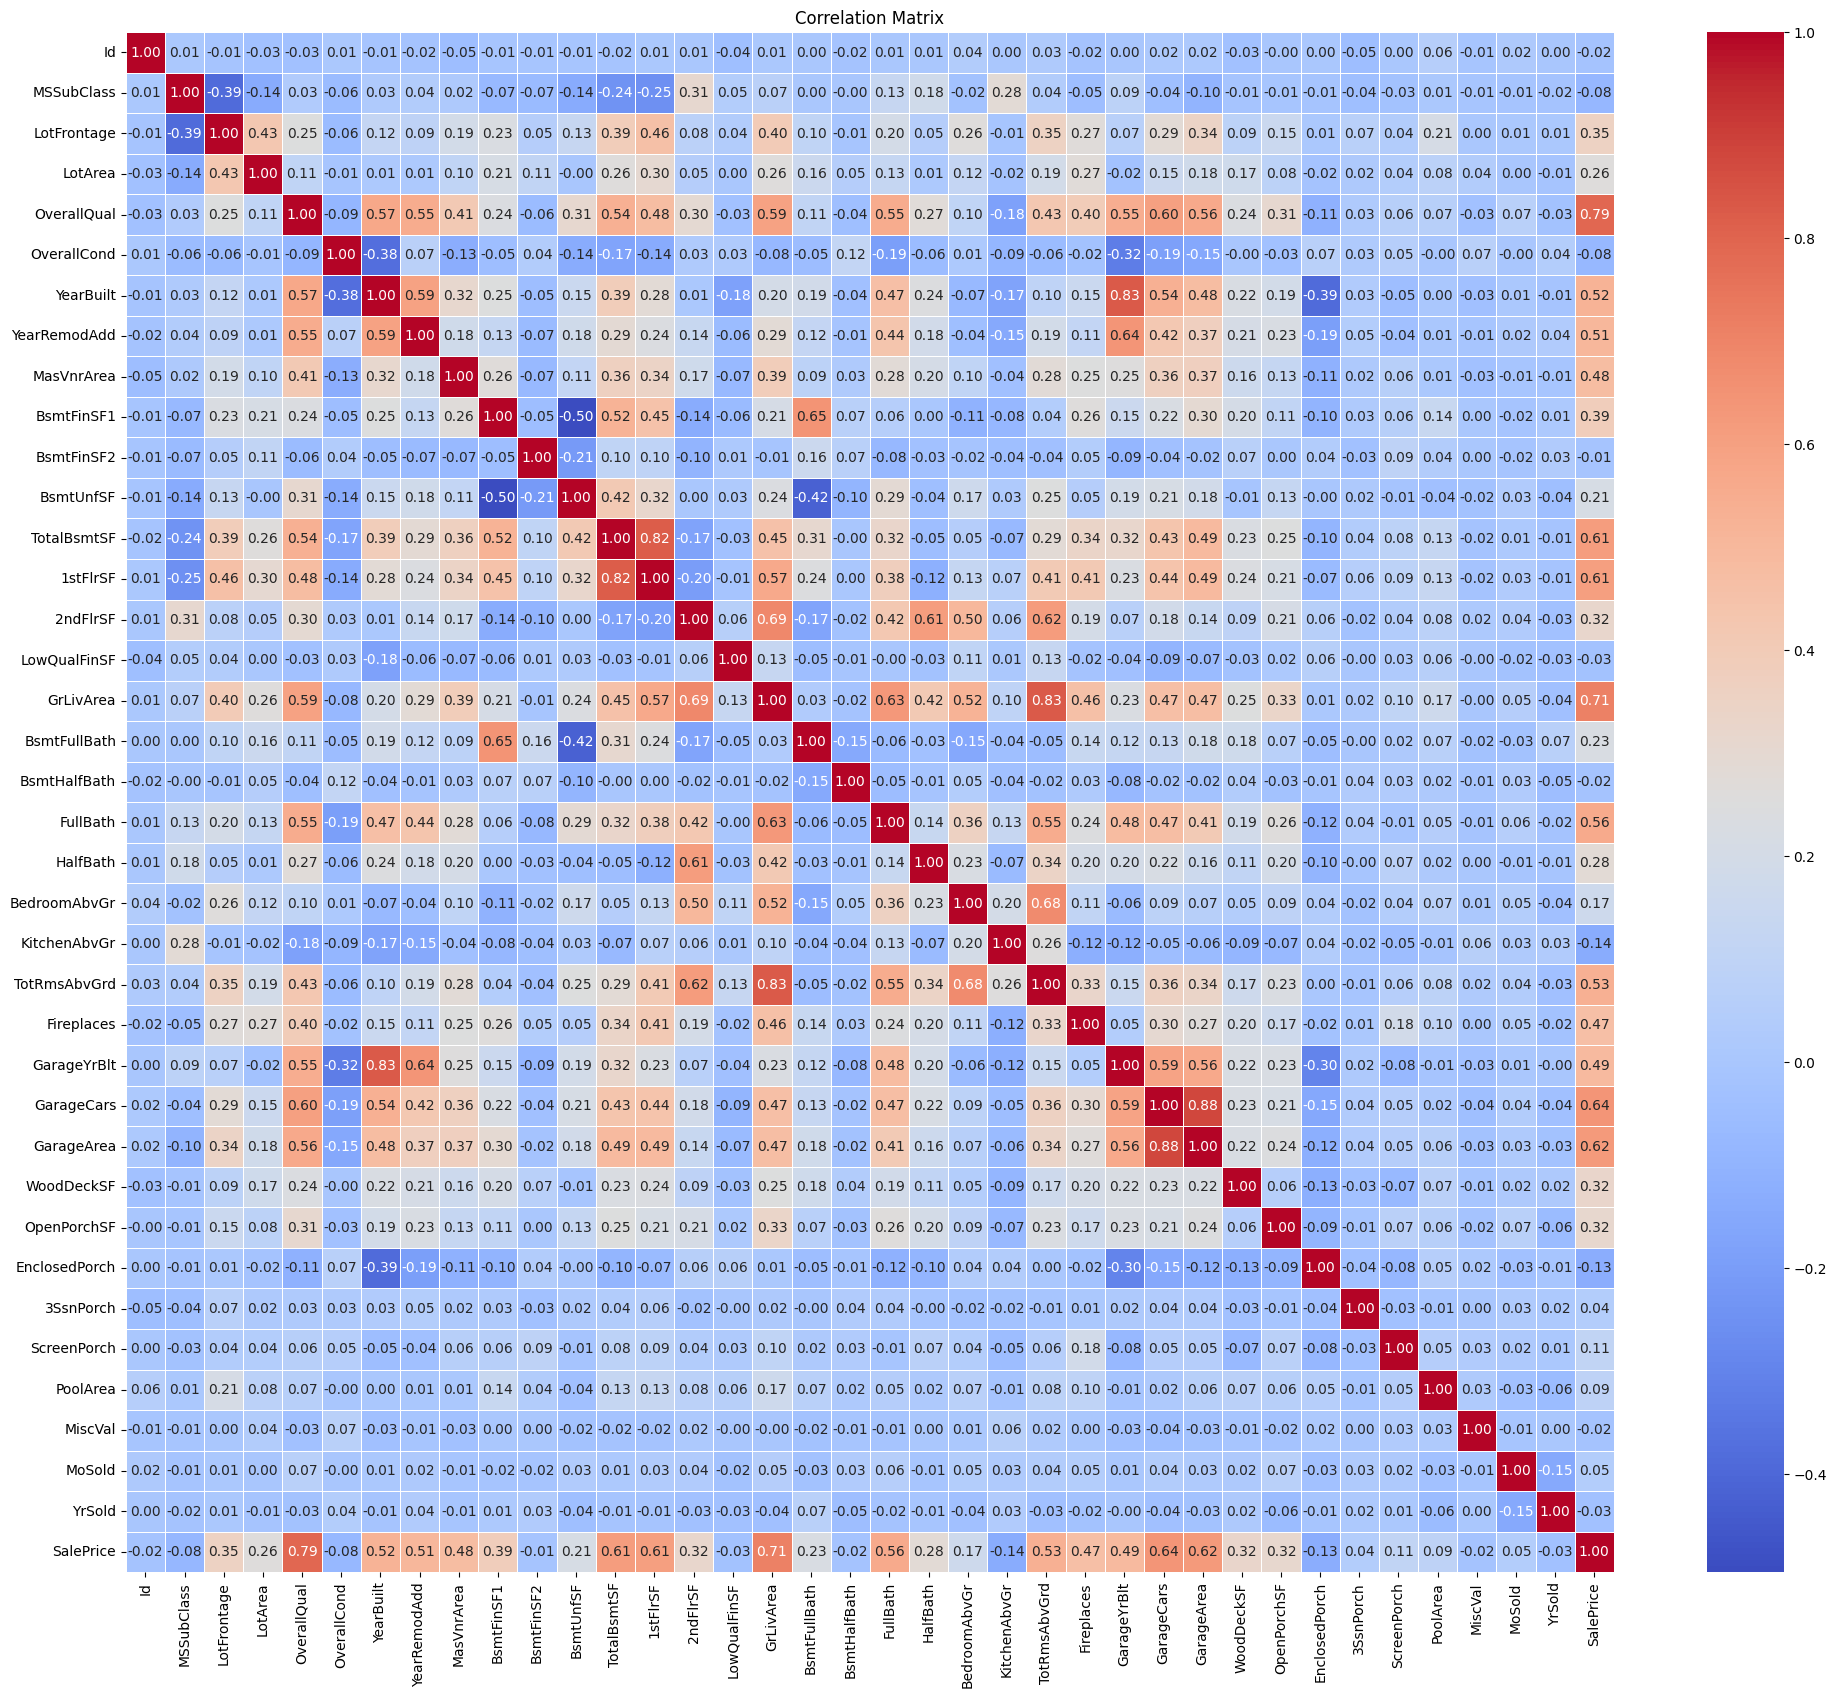

In [8]:
# Correlation matrix
corr_matrix = train_df[numerical_columns].corr()
plt.figure(figsize=(24, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

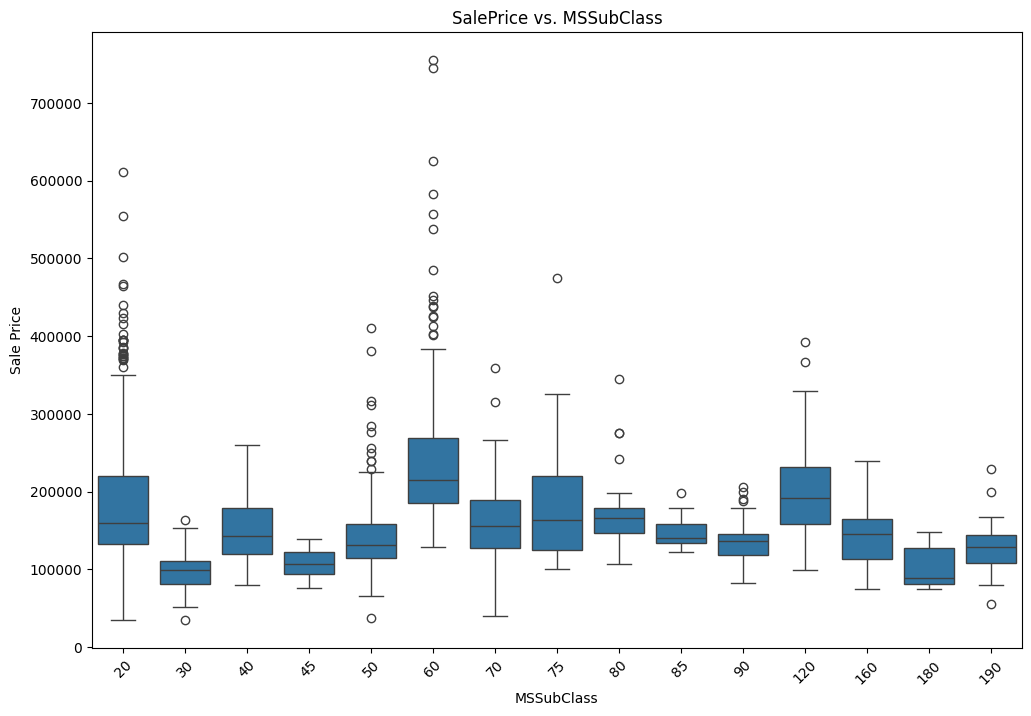

In [9]:
# Boxplot of SalePrice vs. MSSubClass
plt.figure(figsize=(12, 8))
sns.boxplot(x='MSSubClass', y='SalePrice', data=train_df)
plt.title('SalePrice vs. MSSubClass')
plt.xlabel('MSSubClass')
plt.ylabel('Sale Price')
plt.xticks(rotation=45)
plt.show()

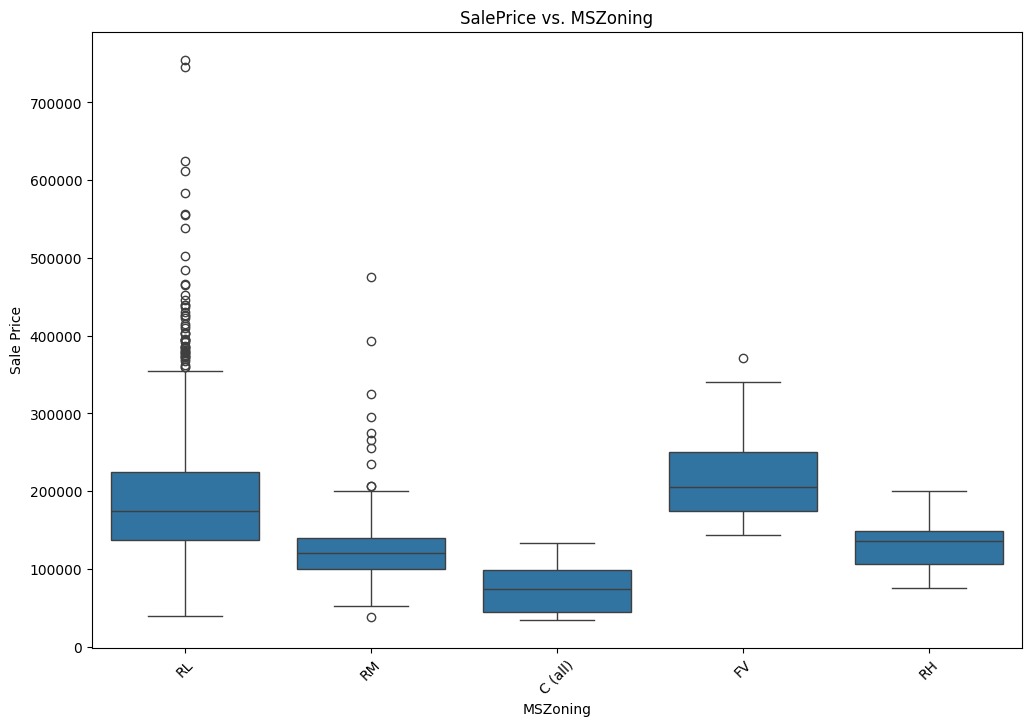

In [10]:
# Boxplot of SalePrice vs. MSZoning
plt.figure(figsize=(12, 8))
sns.boxplot(x='MSZoning', y='SalePrice', data=train_df)
plt.title('SalePrice vs. MSZoning')
plt.xlabel('MSZoning')
plt.ylabel('Sale Price')
plt.xticks(rotation=45)
plt.show()

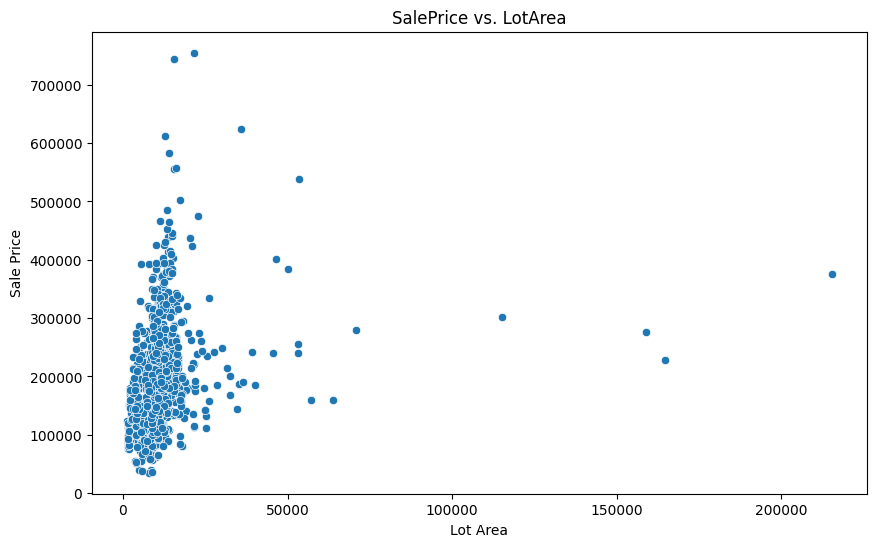

In [11]:
# Scatterplot of LotArea vs. SalePrice
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LotArea', y='SalePrice', data=train_df)
plt.title('SalePrice vs. LotArea')
plt.xlabel('Lot Area')
plt.ylabel('Sale Price')
plt.show()

In [12]:
# Combine train and test data for consistent preprocessing
df = pd.concat([train_df, test_df], sort=False)

In [13]:
# Fill missing values in other categorical columns with the most frequent value
categorical_columns = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
imputer = SimpleImputer(strategy='most_frequent')
df[categorical_columns] = imputer.fit_transform(df[categorical_columns])

In [14]:
# Handle missing values for LotFrontage based on the median value of MSZoning
df['LotFrontage'] = df.groupby('MSZoning')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [15]:
# Encode categorical variables
# Example: Label Encoding for ordinal features
ordinal_features = {
    'ExterQual': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'ExterCond': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'BsmtQual': {'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'BsmtCond': {'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'HeatingQC': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'KitchenQual': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'FireplaceQu': {'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'GarageQual': {'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'GarageCond': {'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'PoolQC': {'NA': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4},
    'Fence': {'NA': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4}
}

for feature, mapping in ordinal_features.items():
    df[feature] = df[feature].map(mapping)

In [16]:
# Example: One-Hot Encoding for nominal categorical features
nominal_features = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 
                    'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 
                    'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 
                    'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageType', 'PavedDrive', 
                    'SaleType', 'SaleCondition']

df = pd.get_dummies(df, columns=nominal_features, drop_first=True)

In [17]:
# Create new features
# Example: Total bathrooms
df['TotalBath'] = (df['FullBath'] + 0.5 * df['HalfBath'] + df['BsmtFullBath'] + 0.5 * df['BsmtHalfBath'])

# Example: Age of the house
df['HouseAge'] = df['YrSold'] - df['YearBuilt']

# Example: Remodeled or not
df['Remodeled'] = np.where(df['YearBuilt'] == df['YearRemodAdd'], 0, 1)

# Example: Total square feet of living area
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

# Drop columns that are no longer needed or redundant
df.drop(['YearBuilt', 'YearRemodAdd'], axis=1, inplace=True)

In [18]:
# Separate the train and test data
df_train = df[df['SalePrice'].notnull()]
df_test = df[df['SalePrice'].isnull()]

In [19]:
# Prepare the target variable
y_train = df_train['SalePrice']
X_train = df_train.drop(['SalePrice'], axis=1)
X_test = df_test.drop(['SalePrice'], axis=1)

In [20]:
# Normalize/Standardize numerical features
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [21]:
X_train.select_dtypes('O').columns

Index(['BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageFinish',
       'MiscFeature'],
      dtype='object')

In [22]:
X_train = X_train.drop(X_train.select_dtypes('O').columns, axis = 1)
X_test = X_test.drop(X_test.select_dtypes('O').columns, axis = 1)

In [23]:
# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [24]:
y_pred_test = model.predict(X_test)

In [25]:
# Save the predictions for the test set
test_df['SalePrice'] = y_pred_test
test_df[['Id', 'SalePrice']].to_csv('test_predictions.csv', index=False)